In [17]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
features = ["pclass","sex","embarked","age","fare"]
target = ["survived"]

In [10]:
# missing data
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
df[["age"]] = imp_median.fit_transform(df[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
df[["embarked"]] = imp_freq.fit_transform(df[["embarked"]])

In [11]:
# encode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

In [13]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y , test_size=0.2, random_state=42
)

In [15]:
X_train.head()

,pclass,sex,embarked,age,fare
331,1,1,2,45.5,28.5000
733,2,1,2,23.0,13.0000
382,3,1,2,32.0,7.9250
704,3,1,2,26.0,7.8542
813,3,0,2,6.0,31.2750


Decision tree model -- no pruning 

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [18]:
# Accuracy score
y_pred = model.predict(X_test)

print("Accuracy score : ", accuracy_score(y_test , y_pred))

Accuracy score :  0.7653631284916201


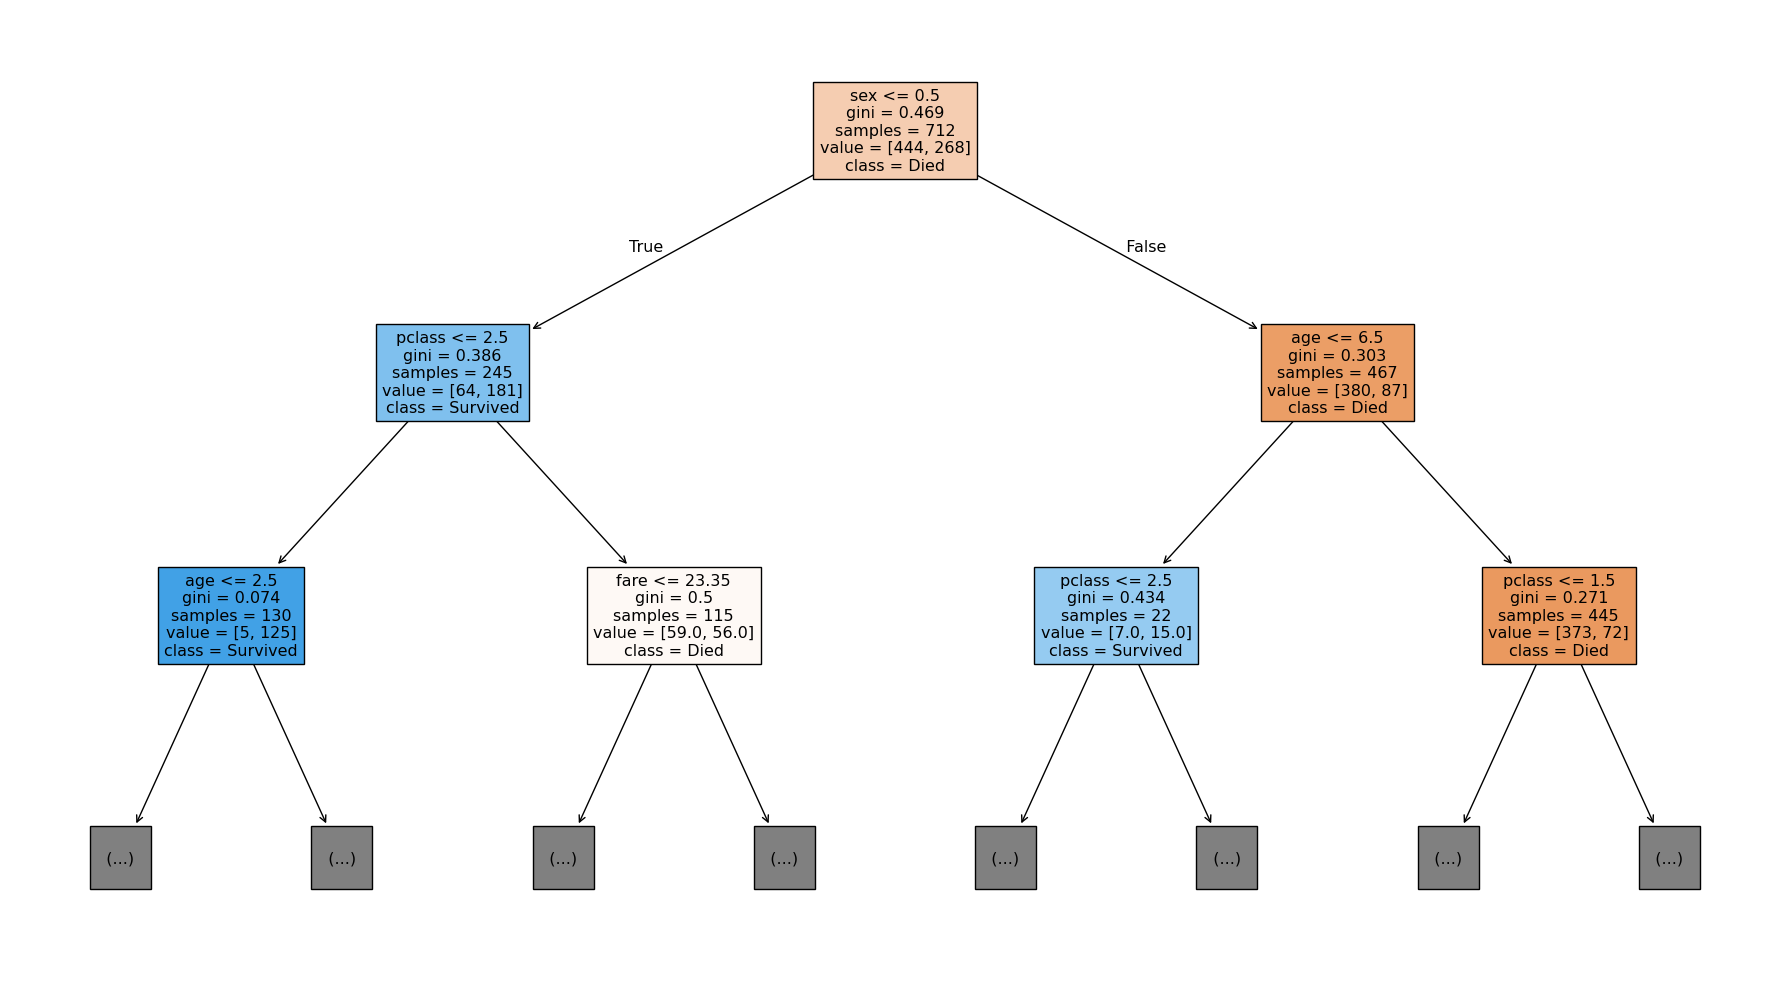

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
    max_depth=2
)

plt.tight_layout()
plt.show()